### Model Emotions Detection Fake News

In [1]:
#!pip install xgboost
#!pip install pingouin

In [123]:
import pandas as pd
import ast
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import pingouin as pg
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
import numpy as np

In [124]:
df_train = pd.read_csv('../Dataset/labeld_all.csv')

In [128]:
df_train['fake'] = df_train['BinaryNumTarget']

In [129]:
df_train.head()

,Unnamed: 0.1,Unnamed: 0,id,majority_target,statement,BinaryNumTarget,tweet,followers_count,friends_count,favourites_count,...,ampersand,capitals,digits,long_word_freq,short_word_freq,Arousal_pred,Arousal_perc,Valence_pred,Valence_perc,fake
0,0,0.0,132520,False,Since Trump labeled ANTIFA a terrorist organiz...,0.0,@tl_trevaskis @Bpage5 @CheriJacobus Which is e...,117.0,443.0,4406.0,...,0,4,0,3,13,0,"[0.8921529054641724, 0.07831133157014847, 0.02...",2,"[0.03164537623524666, 0.031106766313314438, 0....",0.0
1,1,1.0,16909,True,Says the Trump administration transferred $10 ...,1.0,@realDonaldTrump Sen. Jeff Merkley released a ...,605.0,1077.0,15227.0,...,0,5,6,1,6,0,"[0.9320166110992432, 0.03751523420214653, 0.03...",2,"[0.030032258480787277, 0.030275417491793633, 0...",1.0
2,2,2.0,67861,True,"The Keystone pipeline creates ""35 permanent jo...",1.0,@movieguy82 @PaulCogan @lisalocicerogh Trump t...,9233.0,1379.0,28919.0,...,0,10,0,2,12,1,"[0.054461825639009476, 0.8415970206260681, 0.1...",2,"[0.02977902628481388, 0.031082626432180405, 0....",1.0
3,3,3.0,22168,True,"""Afghanistan has more hectares (of opium poppi...",1.0,@pleasexplainMrI @MingGao26 When US and Britis...,5429.0,5803.0,120316.0,...,0,15,19,3,31,2,"[0.10533934831619263, 0.3858444392681122, 0.50...",2,"[0.033325646072626114, 0.2485164999961853, 0.7...",1.0
4,4,4.0,124830,False,Says President Barack Obama spied on my campai...,0.0,So Obama along with his team of lowlifes spied...,7.0,0.0,0.0,...,0,10,3,3,19,0,"[0.9383224248886108, 0.030329681932926178, 0.0...",2,"[0.029549088329076767, 0.029803887009620667, 0...",0.0


In [143]:
def extract_fake_perc(x):
    try:
        # Versuche, den String in eine Python-Datenstruktur umzuwandeln
        parsed_x = ast.literal_eval(x)
        
        # Überprüfe, ob das Ergebnis eine Liste mit genau zwei Elementen ist
        if isinstance(parsed_x, list) and len(parsed_x) == 3:
            return parsed_x[0], parsed_x[1], parsed_x[2],
        else:
            return float('nan'), float('nan'), float('nan')
    except (ValueError, SyntaxError, TypeError):
        # Wenn die Umwandlung fehlschlägt oder der Inhalt ungültig ist
        print('ERROR')
        return float('nan'), float('nan'), float('nan')


    
df_train[['high', 'medium', 'low']] = df_train['Arousal_perc'].apply(extract_fake_perc).apply(pd.Series)
df_train[['positive', 'neutral', 'negative']] = df_train['Valence_perc'].apply(extract_fake_perc).apply(pd.Series)


### Model 1

#### Emotions

In [144]:
X_one = df_train[['high', 'medium', 'low', 'positive', 'neutral', 'negative']]
y_one = df_train['fake']
X_train_one, X_test_one, y_train_one, y_test_one = train_test_split(X_one, y_one, test_size=0.2, random_state=42)

In [145]:
xgb_model_one = XGBClassifier(objective='binary:logistic', max_depth=3, learning_rate=0.1, n_estimators=100)

In [146]:
scoring = ['accuracy', 'precision', 'recall', 'f1']

In [147]:
cv_results = cross_validate(xgb_model_one, X_one, y_one, cv=5, scoring=scoring)

In [148]:
for fold in range(5):
    print(f"\nFold {fold + 1}:")
    five_fold_basic = {
        'accuracy': f"{cv_results['test_accuracy'][fold]:.4f}",
        'precision': f"{cv_results['test_precision'][fold]:.4f}",
        'recall': f"{cv_results['test_recall'][fold]:.4f}",
        'f1': f"{cv_results['test_f1'][fold]:.4f}"
    }
    print(five_fold_basic)


Fold 1:
{'accuracy': '0.6186', 'precision': '0.6214', 'recall': '0.6657', 'f1': '0.6428'}

Fold 2:
{'accuracy': '0.6146', 'precision': '0.6251', 'recall': '0.6308', 'f1': '0.6279'}

Fold 3:
{'accuracy': '0.6215', 'precision': '0.6274', 'recall': '0.6545', 'f1': '0.6406'}

Fold 4:
{'accuracy': '0.6071', 'precision': '0.6168', 'recall': '0.6279', 'f1': '0.6223'}

Fold 5:
{'accuracy': '0.6075', 'precision': '0.6165', 'recall': '0.6317', 'f1': '0.6240'}


In [149]:
print("\nAverage scores across all folds:")
print(f"Accuracy: {np.mean(cv_results['test_accuracy']):.4f} (+/- {np.std(cv_results['test_accuracy']):.4f})")
print(f"Precision: {np.mean(cv_results['test_precision']):.4f} (+/- {np.std(cv_results['test_precision']):.4f})")
print(f"Recall: {np.mean(cv_results['test_recall']):.4f} (+/- {np.std(cv_results['test_recall']):.4f})")
print(f"F1 Score: {np.mean(cv_results['test_f1']):.4f} (+/- {np.std(cv_results['test_f1']):.4f})")


Average scores across all folds:
Accuracy: 0.6138 (+/- 0.0058)
Precision: 0.6214 (+/- 0.0044)
Recall: 0.6421 (+/- 0.0152)
F1 Score: 0.6315 (+/- 0.0085)


In [150]:
xgb_model_one.fit(X_one, y_one)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [151]:
y_pred = xgb_model_one.predict(X_test_one)

# Print final test set metrics
print("\nFinal Test Set Metrics:")
print(f"Accuracy: {accuracy_score(y_test_one, y_pred):.4f}")
print(f"Precision: {precision_score(y_test_one, y_pred):.4f}")
print(f"Recall: {recall_score(y_test_one, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test_one, y_pred):.4f}")


Final Test Set Metrics:
Accuracy: 0.6176
Precision: 0.6248
Recall: 0.6423
F1 Score: 0.6334


### Model 2

#### long sequences + Emotions

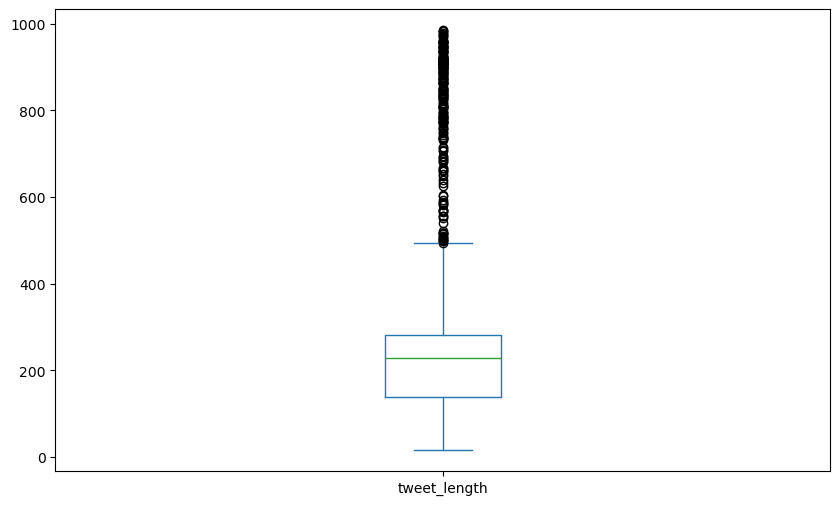

In [152]:
df_train['tweet_length'] = df_train['tweet'].str.len()
boxplot = df_train['tweet_length'].plot.box(figsize=(10, 6))

In [153]:
df_train['tweet_length'].describe()

count    41602.000000
mean       215.954233
std         89.964725
min         16.000000
25%        139.000000
50%        228.000000
75%        281.000000
max        985.000000
Name: tweet_length, dtype: float64

In [154]:
df_train_short = df_train[df_train['tweet_length']>139]

In [155]:
len(df_train_short)

31143

In [156]:
X_two = df_train_short[['high', 'medium', 'low', 'positive', 'neutral', 'negative']]
y_two = df_train_short['fake']
X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(X_two, y_two, test_size=0.2, random_state=42)

In [157]:
xgb_model_two = XGBClassifier(objective='binary:logistic', max_depth=3, learning_rate=0.1, n_estimators=100)

In [158]:
scoring = ['accuracy', 'precision', 'recall', 'f1']

In [159]:
cv_results = cross_validate(xgb_model_two, X_two, y_two, cv=5, scoring=scoring)

In [167]:
for fold in range(5):
    print(f"\nFold {fold + 1}:")
    five_fold_basic = {
        'accuracy': f"{cv_results['test_accuracy'][fold]:.4f}",
        'precision': f"{cv_results['test_precision'][fold]:.4f}",
        'recall': f"{cv_results['test_recall'][fold]:.4f}",
        'f1': f"{cv_results['test_f1'][fold]:.4f}"
    }
    print(five_fold_basic)


Fold 1:
{'accuracy': '0.6123', 'precision': '0.6036', 'recall': '0.5626', 'f1': '0.5824'}

Fold 2:
{'accuracy': '0.6128', 'precision': '0.6117', 'recall': '0.5316', 'f1': '0.5688'}

Fold 3:
{'accuracy': '0.6117', 'precision': '0.6032', 'recall': '0.5606', 'f1': '0.5811'}

Fold 4:
{'accuracy': '0.5999', 'precision': '0.5993', 'recall': '0.5043', 'f1': '0.5477'}

Fold 5:
{'accuracy': '0.6093', 'precision': '0.6027', 'recall': '0.5481', 'f1': '0.5741'}


In [168]:
print("\nAverage scores across all folds:")
print(f"Accuracy: {np.mean(cv_results['test_accuracy']):.4f} (+/- {np.std(cv_results['test_accuracy']):.4f})")
print(f"Precision: {np.mean(cv_results['test_precision']):.4f} (+/- {np.std(cv_results['test_precision']):.4f})")
print(f"Recall: {np.mean(cv_results['test_recall']):.4f} (+/- {np.std(cv_results['test_recall']):.4f})")
print(f"F1 Score: {np.mean(cv_results['test_f1']):.4f} (+/- {np.std(cv_results['test_f1']):.4f})")


Average scores across all folds:
Accuracy: 0.6092 (+/- 0.0048)
Precision: 0.6041 (+/- 0.0041)
Recall: 0.5415 (+/- 0.0216)
F1 Score: 0.5708 (+/- 0.0126)


In [169]:
xgb_model_two.fit(X_two, y_two)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [170]:
y_pred = xgb_model_two.predict(X_test_two)

# Print final test set metrics
print("\nFinal Test Set Metrics:")
print(f"Accuracy: {accuracy_score(y_test_two, y_pred):.4f}")
print(f"Precision: {precision_score(y_test_two, y_pred):.4f}")
print(f"Recall: {recall_score(y_test_two, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test_two, y_pred):.4f}")


Final Test Set Metrics:
Accuracy: 0.6211
Precision: 0.6156
Recall: 0.5511
F1 Score: 0.5816


### Visualize Features

In [171]:
def visualize_feature_importance(model, X, n_top_features=10):
    importances = model.feature_importances_
    
    feature_importance_df = pd.DataFrame({
        'feature': X.columns,
        'importance': importances
    })
    
    top_features = feature_importance_df.sort_values('importance', ascending=False).head(n_top_features)
    
    plt.figure(figsize=(10, 6))
    plt.barh(top_features['feature'], top_features['importance'])
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.title(f'Top {n_top_features} Most Important Features')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()


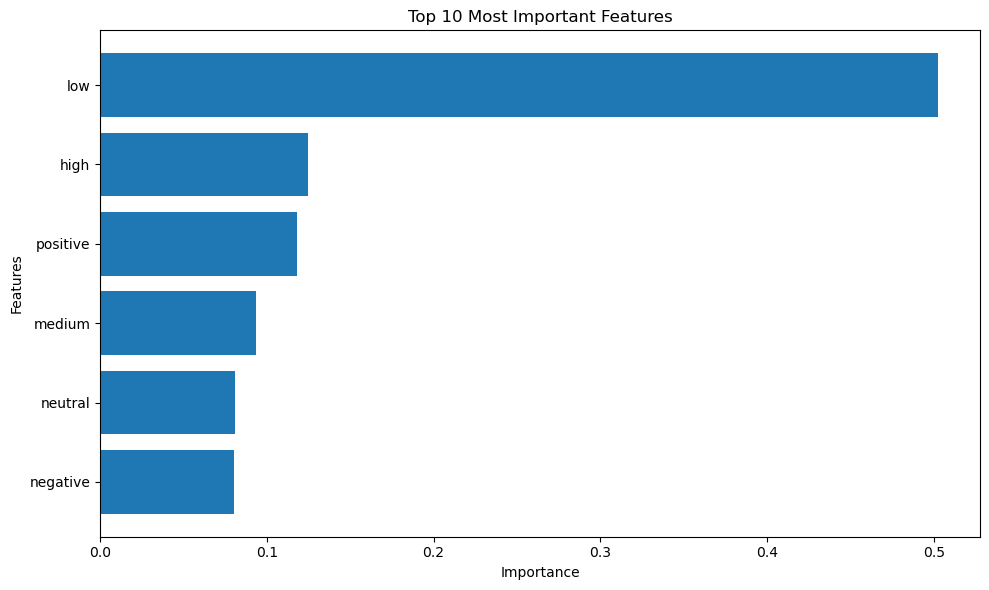

In [172]:
visualize_feature_importance(xgb_model_one,X_one)

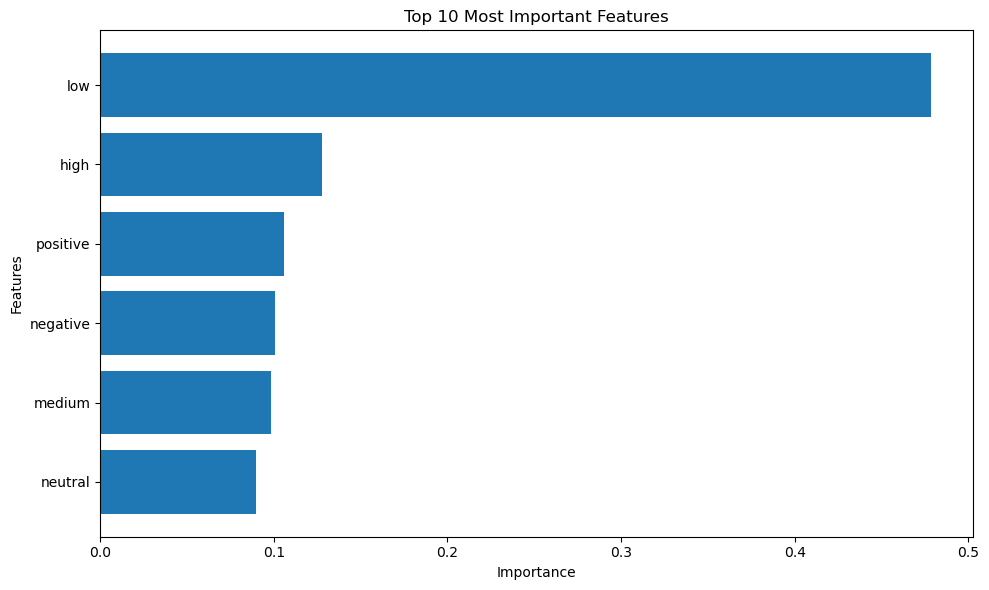

In [173]:
visualize_feature_importance(xgb_model_two,X_two)

In [174]:
df_evaluation = pd.read_csv("evaluation_test.csv")
df_evaluate_ground = pd.read_csv("evaluation.csv")

In [177]:
df_evaluate_ground['id']=df_evaluate_ground['id'].astype(str)

In [178]:
columns_to_add = ['id','long_word_freq', 'short_word_freq', 'capitals', 'followers_count', 'friends_count', 'favourites_count', 'replies']
df_evaluate_ground = df_evaluate_ground[columns_to_add]
ls = df_evaluation['id']
df_evaluate_ground = df_evaluate_ground[df_evaluate_ground['id'].isin(ls)]
df_evaluation = pd.merge(df_evaluation, df_evaluate_ground, on='id', how='left')

In [179]:
df_evaluation[['high', 'medium', 'low']] = df_evaluation['Arousal_perc'].apply(extract_fake_perc).apply(pd.Series)
df_evaluation[['positive', 'neutral', 'negative']] = df_evaluation['Valence_perc'].apply(extract_fake_perc).apply(pd.Series)

ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


In [180]:
df_evaluation.head()

,Unnamed: 0,id,BinaryNumTarget,tweet,Arousal_pred,Arousal_perc,Valence_pred,Valence_perc,Fake_pred,Fake_perc,...,followers_count,friends_count,favourites_count,replies,high,medium,low,positive,neutral,negative
0,0,56906,0.0,@whatif31981623 Make a Wish foundation is Refu...,low,"[0.1326914131641388, 0.24623245000839233, 0.62...",negative,"[0.03171123191714287, 0.03837065026164055, 0.9...",0.0,"[0.9999607801437378, 3.9167462091427296e-05]",...,34864.0,27302.0,62171.0,3.0,0.132691,0.246232,0.621076,0.031711,0.038371,0.929918
1,1,56907,0.0,Ok Im mad. A terminally ill child cant be gran...,high,"[0.9318737387657166, 0.03726280853152275, 0.03...",negative,"[0.0301770381629467, 0.03047206811606884, 0.93...",0.0,"[0.9999581575393677, 4.18948802689556e-05]",...,14677.0,7457.0,192207.0,23.0,0.931874,0.037263,0.030863,0.030177,0.030472,0.939351
2,2,56908,0.0,Make a wish foundation denied a wish bec the c...,high,"[0.9302671551704407, 0.03267449513077736, 0.03...",negative,"[0.03034738078713417, 0.03081173449754715, 0.9...",0.0,"[0.9999600648880005, 3.9967453631106764e-05]",...,1059.0,1171.0,27744.0,0.0,0.930267,0.032674,0.037058,0.030347,0.030812,0.938841
3,3,56909,0.0,Conservative social media is raging over a vid...,high,"[0.9135966897010803, 0.0564948171377182, 0.029...",negative,"[0.030134277418255806, 0.02990962564945221, 0....",0.0,"[0.9999620914459229, 3.78719087166246e-05]",...,1970.0,3478.0,32988.0,2.0,0.913597,0.056495,0.029908,0.030134,0.029910,0.939956
4,4,56910,0.0,Just heard Make a Wish Foundation refused to g...,high,"[0.9327077865600586, 0.03121083416044712, 0.03...",negative,"[0.029550665989518166, 0.03048470802605152, 0....",0.0,"[0.9999599456787109, 4.0039703890215605e-05]",...,440.0,975.0,17834.0,0.0,0.932708,0.031211,0.036081,0.029551,0.030485,0.939965


In [185]:
columns = ['high', 'medium', 'low', 'positive', 'neutral', 'negative']
for column in columns:
    df_evaluation.dropna(subset=[column], inplace=True)

In [187]:
df_evaluation['fake'] = df_evaluation['BinaryNumTarget'].astype(float).astype(int)
df_evaluation['fake']

0        0
1        0
2        0
3        0
4        0
        ..
30192    1
30193    1
30194    1
30195    1
30196    1
Name: fake, Length: 30190, dtype: int64

In [194]:
def evaluate_model(model, df, df_eval, name):
    y_pred = model.predict(df)
    accuracy = accuracy_score(df_eval, y_pred)
    precision = precision_score(df_eval, y_pred)
    recall = recall_score(df_eval, y_pred)
    f1 = f1_score(df_eval, y_pred)

    return  {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1}    
    print(classification_report(df_eval, y_pred))

In [195]:
struktur = df_evaluation[['high', 'medium', 'low', 'positive', 'neutral', 'negative']]

In [196]:
# Model 1
evaluate_model(xgb_model_one,struktur,df_evaluation['fake'],"Model 1" )

{'accuracy': 0.6020536601523684,
 'precision': 0.6006915540756868,
 'recall': 0.6188402928953097,
 'f1': 0.6096308812061347}

In [122]:
# Model 2
evaluate_model(xgb_model_two,struktur,df_evaluation['fake'],"Model 2" )

Genauigkeit Model 2: 0.6042066909572706
              precision    recall  f1-score   support

           0       0.59      0.66      0.62     15031
           1       0.62      0.55      0.58     15159

    accuracy                           0.60     30190
   macro avg       0.61      0.60      0.60     30190
weighted avg       0.61      0.60      0.60     30190

